# Determinant analysis

Go to [Index](response_Witz2019_index.ipynb).

In this notebook we perform the "determinant analysis" on 4 experimental datasets from Witz et al (2019) and 6 experimental datasets from Si & Le Treut (2019).


The experimental data files used were generated in the notebooks [response_Witz2019_process_witz_data](response_Witz2019_process_witz_data.ipynb) and [response_Witz2019_import_junlab_data](response_Witz2019_import_junlab_data.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [2]:
import os, copy, pickle, itertools, tabulate
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves
from IPython.display import Image

import sys
sys.path.append('code')
from functions_response import add_allvariables, compute_determinant, plot_Ivalues_main_models, plot_Ivalues, plot_Ivalues_all, plot_Ivalues_all_overlay, load_table, process_gw

## Parameters

In [3]:
label_mapping = { \
                'lambda': "$\lambda$", \
                'Sb': "$S_b$",\
                'Sd': "$S_d$",\
                'tau': "$\\tau$",\
                'tau_cyc': "$\\tau_{cyc}$" , \
                'Si': "$S_i$" , \
                'Delta_bd': "$\Delta_{d}$", \
                'Delta_bi': "$\Delta_{bi}$", \
                'R_bd': "$R_{bd}$", \
                'R_bi': "$R_{bi}$", \
                'Lambda_i_b': "$\Lambda_i^{(b)}$", \
                'Lambda_i': "$\Lambda_i$", \
                'Lambda_i_f': "$\Lambda_i^{(f)}$", \
                'tau_ii_b': "$\\tau_{ii}^{(f)}$", \
                'tau_ii': "$\\tau_{ii}$", \
                'delta_id': "$\delta_{id}$", \
                'delta_ii_backward': "$\delta_{ii}^{(b)}$", \
                'delta_ii': "$\delta_{ii}$", \
                'R_ii_b': "$R_{ii}^{(b)}$", \
                'R_ii': "$R_{ii}$", \
                'R_id': "$R_{id}$"
                }
nval = 50  # number of values to report in the plot
ext_list = ['.png','.svg']

variables = ['lambda', 'Sb', 'Sd', 'tau', 'tau_cyc', 'Delta_bd', 'Si', 'Delta_bi', 'R_bd', 'R_bi', \
             'Lambda_i', 'Lambda_i_b', 'Lambda_i_f', 'tau_ii', 'delta_ii', 'delta_id', 'R_ii', 'R_id']

direxp = os.path.join('.','experiments')
names_all = []


## List possible combinations

In [4]:
combinations = []
nvar = 3

for comb in itertools.combinations(variables, nvar):
    combinations.append(comb)

## Perform determinant analysis on experimental data from Si & Le Treut (2019)

In [5]:
names = ['mg1655_acetate', \
         'mg1655_glucose', \
         'mg1655_glycerol11aa', \
         'ncm3722_arginine', \
         'ncm3722_glucose', \
         'ncm3722_glucose12aa' \
        ]

In [6]:
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)
    if not name in names_all:
        names_all.append(name)
    outputdir = os.path.join(direxp,name)
#     print(fpath)
    
    colidata = pd.read_pickle(fpath)
    add_allvariables(colidata)
    
    # rename some variables
    col_mapping = { \
                'initiator B': 'tau_bi', \
                'tau_ii_f': 'tau_ii', \
                'R_ii_f': 'R_ii'
                }
    
    colidata.rename(columns=col_mapping, inplace=True)

    colidata['lambda'] = colidata['lambda']*60
    ncells = len(colidata)
    print("ncells = {:d}".format(ncells))
    
    
    ncells = len(colidata['Lambda_i'].dropna())
    print("ncells (initiation picked) = {:d}".format(ncells))

    ncells = len(colidata.dropna())
    print("ncells (full information) = {:d}".format(ncells))
    
    # determinant analysis
    table = []
    for comb in combinations:
        data = colidata.loc[:,list(comb)].dropna().to_numpy().astype('float64').T
        I = compute_determinant(data)
    #     print(count,comb,"I = {:.4f}".format(I))
        table += [list(comb) + [I] + [data.shape[1]]]

    table.sort(key=lambda x: x[3], reverse=True)
    headers=['var {:d}'.format(i+1) for i in range(nvar)]+['I']+['npts']

    fname = 'determinant_analysis'
    fpath = os.path.join(outputdir,fname + '.txt')

    with open(fpath,'w') as fout:
        fout.write(tabulate.tabulate(table, tablefmt='plain', headers=headers))
    

mg1655_acetate ./experiments/mg1655_acetate/colidata.pkl
ncells = 1554
ncells (initiation picked) = 1554
ncells (full information) = 519
mg1655_glucose ./experiments/mg1655_glucose/colidata.pkl
ncells = 1807
ncells (initiation picked) = 1807
ncells (full information) = 1283
mg1655_glycerol11aa ./experiments/mg1655_glycerol11aa/colidata.pkl
ncells = 1491
ncells (initiation picked) = 1491
ncells (full information) = 596
ncm3722_arginine ./experiments/ncm3722_arginine/colidata.pkl
ncells = 1701
ncells (initiation picked) = 1701
ncells (full information) = 920
ncm3722_glucose ./experiments/ncm3722_glucose/colidata.pkl
ncells = 1432
ncells (initiation picked) = 1432
ncells (full information) = 650
ncm3722_glucose12aa ./experiments/ncm3722_glucose12aa/colidata.pkl
ncells = 1464
ncells (initiation picked) = 1464
ncells (full information) = 203


## Perform determinant analysis on experimental data from Witz et al (2019)

In [7]:
# parameters
names = [
         'glycerol', \
         'glucose', \
         'glucose8a', \
         'glycerolauto' \
        ]

# data exported by Witz et al.
fpath=os.path.join('..','Data_export','Fig1_2_3.csv')
df_export = pd.read_csv(fpath)
names_export = df_export['condition'].unique().tolist()
match_export = False   # set True to match exported_data in following analysis
dec = 4            

In [8]:
# load files
# names=['glucose8a']
for name in names:
    fpath = os.path.join(direxp,name,'colidata.pkl')
    print(name, fpath)
    if not name in names_all:
        names_all.append(name)
    outputdir = os.path.join(direxp,name)
#     print(fpath)
    
    colidata = pd.read_pickle(fpath)
    
    # add variables
    add_allvariables(colidata, gw=True)

    # rename some variables
    col_mapping = { \
                'initiator B': 'tau_bi', \
                'tau_ii_f': 'tau_ii', \
                'R_ii_f': 'R_ii'
                }
    colidata.rename(columns=col_mapping, inplace=True)

    # rescale growth rate
    colidata['lambda'] = colidata['lambda']*60

    # filter data
    ncells = len(colidata)
    print("ncells (pre-filter) = {:d}".format(ncells))
    
    ## with reference data set
    if match_export and (name in names_export):
        df_ref = df_export.loc[df_export['condition'] == name]
        set_ref = set(df_ref['lambda_inv'].dropna().round(dec).unique().tolist())
        set_data = set(colidata['tau_eff'].dropna().round(dec).unique().tolist())
        selection = list(set_data.intersection(set_ref))
        idx = colidata['tau_eff'].round(dec).isin(selection)
        colidata.drop(colidata.index[~idx], axis=0, inplace=True)
        
    ncells = len(colidata)
    print("ncells (post-filter) = {:d}".format(ncells))

    ncells = len(colidata['Lambda_i'].dropna())
    print("ncells (initiation picked) = {:d}".format(ncells))

    ncells = len(colidata.dropna())
    print("ncells (full information) = {:d}".format(ncells))


#     idx = colidata.dropna().index
    # determinant analysis
    table = []
    for comb in combinations:
        data = colidata.loc[:,list(comb)].dropna().to_numpy().astype('float64').T
        I = compute_determinant(data)
    #     print(count,comb,"I = {:.4f}".format(I))
        table += [list(comb) + [I] + [data.shape[1]]]

    table.sort(key=lambda x: x[3], reverse=True)
    headers=['var {:d}'.format(i+1) for i in range(nvar)]+['I']+['npts']

    fname = 'determinant_analysis'
    fpath = os.path.join(outputdir,fname + '.txt')

    with open(fpath,'w') as fout:
        fout.write(tabulate.tabulate(table, tablefmt='plain', headers=headers))

glycerol ./experiments/glycerol/colidata.pkl
ncells (pre-filter) = 865
ncells (post-filter) = 865
ncells (initiation picked) = 811
ncells (full information) = 395
glucose ./experiments/glucose/colidata.pkl
ncells (pre-filter) = 1094
ncells (post-filter) = 1094
ncells (initiation picked) = 994
ncells (full information) = 479
glucose8a ./experiments/glucose8a/colidata.pkl
ncells (pre-filter) = 1251
ncells (post-filter) = 1251
ncells (initiation picked) = 1118
ncells (full information) = 568
glycerolauto ./experiments/glycerolauto/colidata.pkl
ncells (pre-filter) = 3018
ncells (post-filter) = 3018
ncells (initiation picked) = 2510
ncells (full information) = 825


## Main models

In [9]:
# the 3 special combinations
special_combs = {\
                 'GW': ['lambda', 'delta_ii', 'delta_id'], \
                 'SLT': ['lambda', 'Delta_bd', 'delta_ii'], \
                 'HC': ['lambda', 'tau_cyc', 'Lambda_i'] \
                }
special_combs_keys = list(special_combs.keys())
special_colors = ['darkblue', 'yellow', 'darkred', 'darkgreen']

In [10]:
for name in names_all:
# for name in names:
    print('-'*10)
    print(name)
    
    fname = 'determinant_analysis'
    
    fpath = os.path.join(direxp,name,fname + '.txt')
    table = load_table(fpath)

    for key in special_combs_keys:
        myvars = set(special_combs[key])
        for line in table:
            thisvars = set(line[:3])
            I = float(line[3])
            npts = int(line[4])
            if myvars == thisvars:
                print("{:<20s}I = {:.6f}  (npts = {:d})".format(key,I,npts))
                break
        # end reading the table
    # end checking special combinations

----------
mg1655_acetate
GW                  I = 0.924268  (npts = 1074)
SLT                 I = 0.829172  (npts = 1074)
HC                  I = 0.417602  (npts = 1554)
----------
mg1655_glucose
GW                  I = 0.875542  (npts = 1640)
SLT                 I = 0.833507  (npts = 1640)
HC                  I = 0.471560  (npts = 1807)
----------
mg1655_glycerol11aa
GW                  I = 0.812516  (npts = 1233)
SLT                 I = 0.713263  (npts = 1233)
HC                  I = 0.497346  (npts = 1491)
----------
ncm3722_arginine
GW                  I = 0.807433  (npts = 1247)
SLT                 I = 0.934928  (npts = 1247)
HC                  I = 0.671608  (npts = 1701)
----------
ncm3722_glucose
GW                  I = 0.939279  (npts = 1107)
SLT                 I = 0.973360  (npts = 1107)
HC                  I = 0.738780  (npts = 1432)
----------
ncm3722_glucose12aa
GW                  I = 0.927092  (npts = 1088)
SLT                 I = 0.952118  (npts = 1088)
HC             

### Make plots

In [11]:
# the 3 special combinations
special_combs = {\
                 'GW': ['lambda', 'delta_ii', 'delta_id'], \
                 'HC': ['lambda', 'tau_cyc', 'Lambda_i'], \
                 'SLT': ['lambda', 'Delta_bd', 'delta_ii'], \
                }
special_colors = ['darkblue', 'darkred', 'darkgreen']

In [12]:
tables = []
specials = [comb for comb in special_combs.values()]
for name in names_all:
    print('-'*10)
    print(name)
    
    # load data
    fname = 'determinant_analysis'
    fpath = os.path.join(direxp,name,fname + '.txt')
    table = load_table(fpath)
    tables.append(table)
    
    # make figure
    ## first figure
    fname = "determinant_analysis_top{:d}".format(nval)
    fpath = os.path.join(direxp,name,fname)
    figname = name
    fig = plot_Ivalues(table, label_mapping, fig_title=figname, nval=nval, figsize=(3,12), fmt_str='{:.4f}', specials=specials, special_colors=special_colors)
    
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')
    


    ## second figure
    fname = "determinant_analysis_all"
    fpath = os.path.join(direxp,name,fname)
    figname = name

    fig = plot_Ivalues_all(table, fig_title=figname, figsize=(12,3), fmt_str='{:.4f}', specials=specials, special_colors=special_colors)
    
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

----------
mg1655_acetate
Saved figure in ./experiments/mg1655_acetate/determinant_analysis_top50.png
Saved figure in ./experiments/mg1655_acetate/determinant_analysis_top50.svg
Found special combination!
Found special combination!
Found special combination!
Saved figure in ./experiments/mg1655_acetate/determinant_analysis_all.png
Saved figure in ./experiments/mg1655_acetate/determinant_analysis_all.svg
----------
mg1655_glucose
Saved figure in ./experiments/mg1655_glucose/determinant_analysis_top50.png
Saved figure in ./experiments/mg1655_glucose/determinant_analysis_top50.svg
Found special combination!
Found special combination!
Found special combination!
Saved figure in ./experiments/mg1655_glucose/determinant_analysis_all.png
Saved figure in ./experiments/mg1655_glucose/determinant_analysis_all.svg
----------
mg1655_glycerol11aa
Saved figure in ./experiments/mg1655_glycerol11aa/determinant_analysis_top50.png
Saved figure in ./experiments/mg1655_glycerol11aa/determinant_analysis_top

In [13]:
# make overlay plot
fname = "determinant_analysis_overlay"
fpath = os.path.join(direxp,fname)
figname = "Overlay of determinant analysis"
fig = plot_Ivalues_all_overlay(tables, fig_title=figname, figsize=(12,3), fmt_str='{:.4f}', specials=specials, special_colors=special_colors)
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
plt.close('all')

Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Found special combination!
Saved figure in ./experiments/determinant_analysis_overlay.png
Saved figure in ./experiments/determinant_analysis_overlay.svg


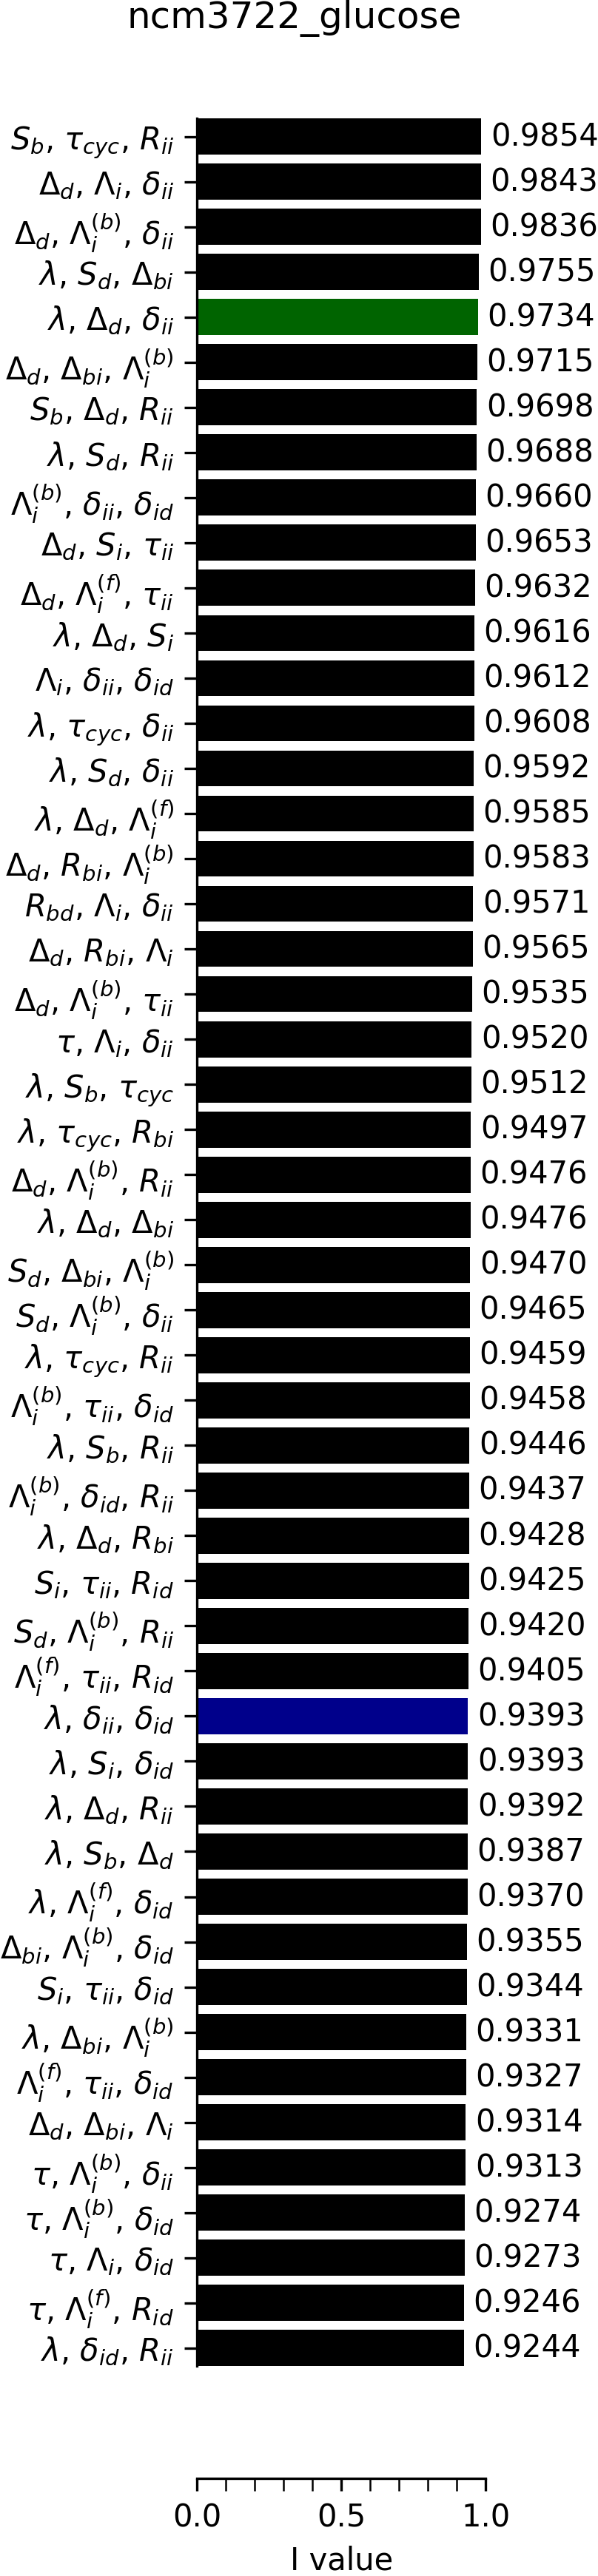

In [14]:
name = 'ncm3722_glucose'

# first figure
fname = "determinant_analysis_top{:d}".format(nval) + '.png'
fpath = os.path.join(direxp,name,fname)
# display one of the previous figures
Image(filename=fpath) 

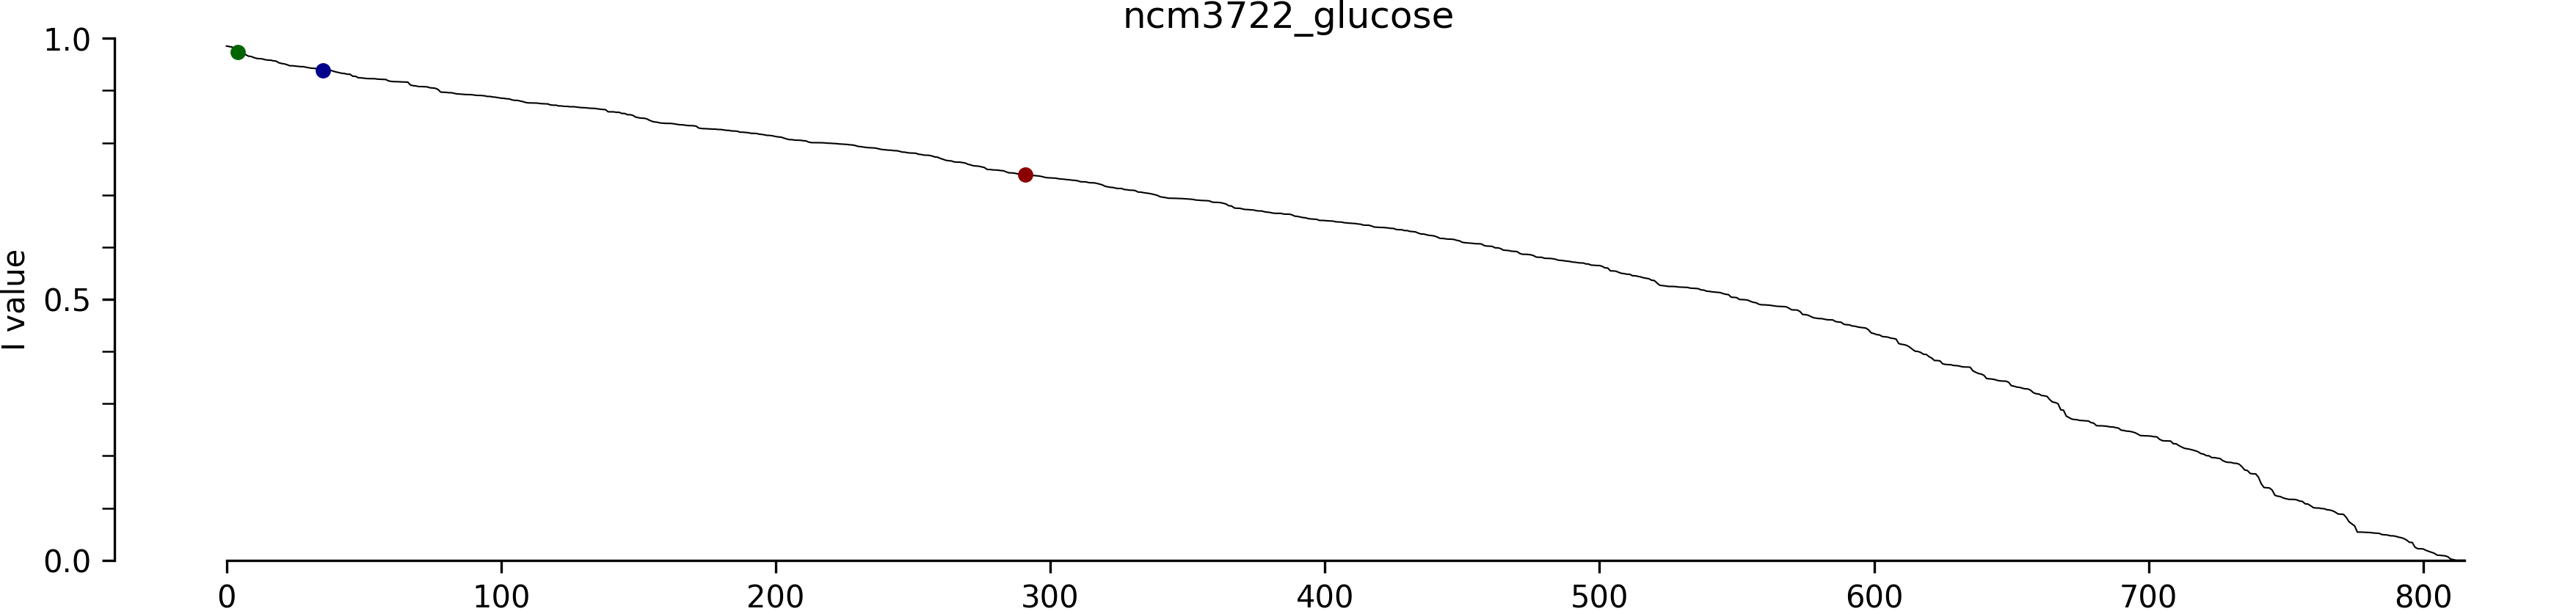

In [15]:
# second figure
fname = "determinant_analysis_all".format(nval) + '.png'
fpath = os.path.join(direxp,name,fname)
# display one of the previous figures
Image(filename=fpath) 

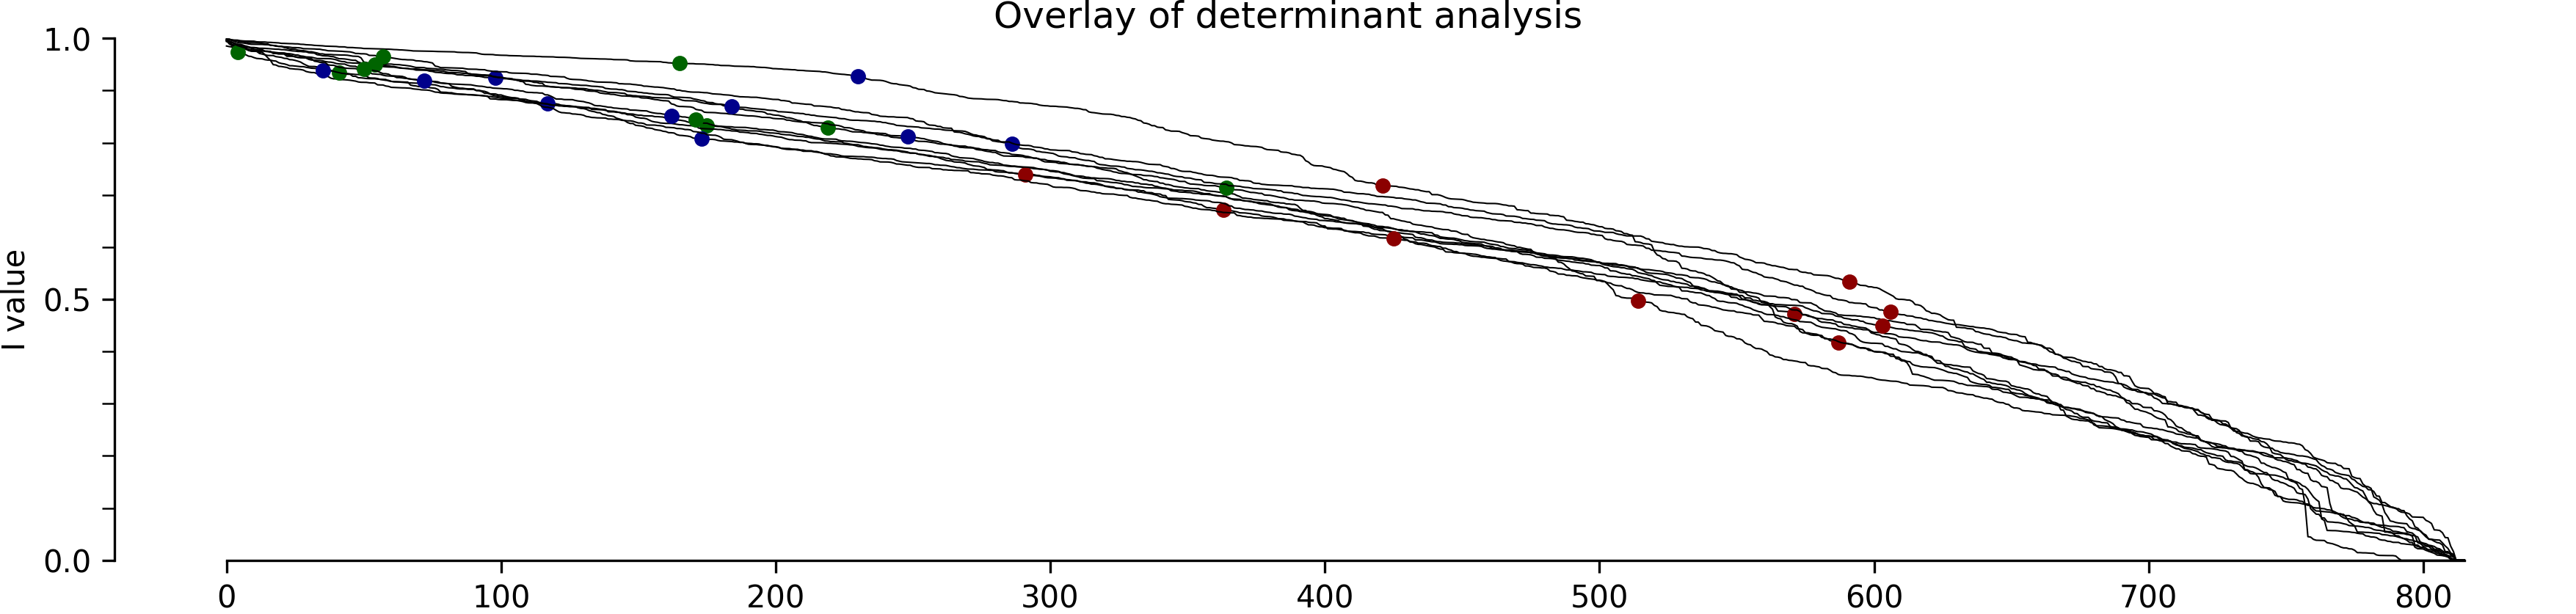

In [16]:
# second figure
fname = "determinant_analysis_overlay" + '.png'
fpath = os.path.join(direxp,fname)
# display one of the previous figures
Image(filename=fpath) 

## Overall score

In [17]:
scores = []
for comb in combinations:
    scores += [list(comb) + [None, None, None]]


In [18]:
for i in range(len(scores)):
    score = scores[i]
    comb = score[:3]
    
    ranks = []
    for name in names_all:
        fname = 'determinant_analysis'
        fpath = os.path.join(direxp,name,fname + '.txt')
        table = load_table(fpath)
        
        for j in range(len(table)):
            line = table[j]
            thiscomb = line[:3]
            
            if thiscomb == comb:
                ranks.append(j+1)
                break
        # end reading all file
    # end loop on conditions
    score[3] = np.sort(ranks)[int(len(ranks)/2)-1]
    score[4] = len(ranks)

medranks = [score[3] for score in scores]
values = np.sort(np.unique(medranks))
for score in scores:
    medrank = score[3]
    score[5] = values.tolist().index(medrank) + 1

scores.sort(key=lambda x: x[3])
headers=['var {:d}'.format(i+1) for i in range(nvar)]+['median rank', 'nexp', 'final rank']

fname = 'determinant_analysis_synthesis'
fpath = os.path.join(direxp,fname + '.txt')

with open(fpath,'w') as fout:
    fout.write(tabulate.tabulate(scores, tablefmt='plain', headers=headers))